In [1]:
from data_loading import get_image_data_loader
from data_loading import transforms_image_net

import matplotlib.pyplot as plt
import numpy as np
import torch
import torchvision.transforms.functional as F
from torchvision.utils import make_grid

plt.rcParams["savefig.bbox"] = 'tight'
def show(imgs):
    if not isinstance(imgs, list):
        imgs = [imgs]
    fix, axs = plt.subplots(ncols=len(imgs), squeeze=False)
    for i, img in enumerate(imgs):
        img = img.detach()
        img = F.to_pil_image(img)
        axs[0, i].imshow(np.asarray(img))
        axs[0, i].set(xticklabels=[], yticklabels=[], xticks=[], yticks=[])

In [2]:
train_data, eval_data = get_image_data_loader(
    "cifar10",
    train=True,
    val_share=0.0,
    shuffle=True,
    batch_size=1024,
    single_batch=True,
)

(a, b) = next(iter(train_data))
print(a.shape, b.shape)

Files already downloaded and verified
Dataset lengths: train-1024, val-1024
torch.Size([1024, 3, 32, 32]) torch.Size([1024])


In [3]:
transform = transforms_image_net(
    crop=True,
    crop_size=32,
    flip=True,
    colors=True,
    standardize=False,)

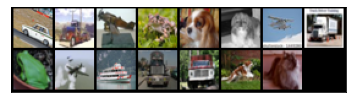

In [11]:
show(make_grid(a[:15]))

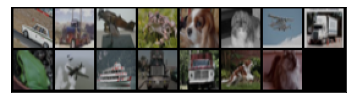

In [12]:
show(make_grid(transform(a[:15])))